In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# read data
df = pd.read_csv('../Data/Deliveryorder.csv')
df.head()

,order_id,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Weather,Road_traffic_density,Vehicle_condition,Time_taken,Vehicle_no,Cost_of_the_Product,...,fuel,name of vehicle,SENDERS_DATE,LOADING_DATE,DISCHARGE_DATE,DELIVERED_DATE,RECEIVERS_DATE,PREDICTED_DELIVERED_DATE,PLACE_OF_SENDERS,PLACE_OF_RECEIVERS 1
0,d792cb16214,COIMBRES18DEL02,30.0,4.63,Stormy,Low,1,19,KA590408,177.0,...,Diesel,Maruti Swift Dzire VDI,18/05/2021,27/05/2021,12/06/2021,24/06/2021,28/06/2021,05/07/2021,New York,Chincoteague Island
1,0d7a144bdd3,VADRES14DEL01,27.0,4.60,Windy,Low,2,14,TN30BC5917,216.0,...,Diesel,Skoda Rapid 15 TDI Ambition,18/05/2021,27/05/2021,12/06/2021,24/06/2021,28/06/2021,05/07/2021,San Jose,Exmore
2,57da4fc703e,AGRRES04DEL03,34.0,4.90,Cloudy,Low,1,27,TN22AR2748,183.0,...,Petrol,Honda City 20172020 EXi,11/04/2021,20/04/2021,06/05/2021,18/05/2021,22/05/2021,29/05/2021,Birmingham,Lawrenceville
3,1b038114c75,BHPRES08DEL02,23.0,5.00,Sandstorms,Medium,2,21,TN28AQ0781,176.0,...,Diesel,Hyundai i20 Sportz Diesel,19/05/2021,28/05/2021,13/06/2021,25/06/2021,29/06/2021,06/07/2021,San Jose,Midlothian
4,bb4e55b4fd9,MYSRES11DEL01,39.0,4.80,Stormy,Medium,0,49,TN68F1722,184.0,...,Petrol,Maruti Swift VXI BSIII,18/05/2021,27/05/2021,12/06/2021,24/06/2021,28/06/2021,05/07/2021,Boston,Virginia Beach


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  10000 non-null  object 
 1   Delivery_person_ID        10000 non-null  object 
 2   Delivery_person_Age       10000 non-null  float64
 3   Delivery_person_Ratings   10000 non-null  float64
 4   Weather                   10000 non-null  object 
 5   Road_traffic_density      9860 non-null   object 
 6   Vehicle_condition         10000 non-null  int64  
 7   Time_taken                10000 non-null  int64  
 8   Vehicle_no                10000 non-null  object 
 9   Cost_of_the_Product       10000 non-null  float64
 10  Quantity                  10000 non-null  float64
 11  fuel                      10000 non-null  object 
 12  name of vehicle           10000 non-null  object 
 13  SENDERS_DATE              10000 non-null  object 
 14  LOADING

In [7]:
# tạo các tuyến đường kết hợp giữa PLACE_OF_SENDERS và PLACE_OF_RECEIVERS 1
df['ROUTE'] = df['PLACE_OF_SENDERS'] + ' - ' + df['PLACE_OF_RECEIVERS 1']
df['ROUTE'].value_counts()

San Jose - Houston      378
New York - Houston      136
Birmingham - Houston    126
Boston - Houston        124
San Jose - Tampa        118
                       ... 
Boston - Pittsburg        1
San Jose - Nevada         1
Birmingham - Girard       1
San Jose - Girard         1
New York - Abingdon       1
Name: ROUTE, Length: 2782, dtype: int64

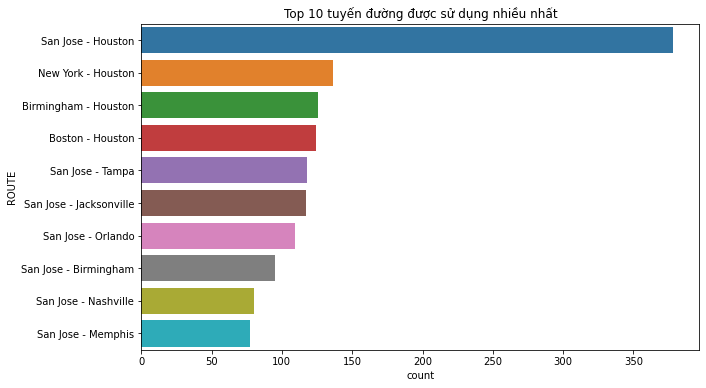

In [29]:
# biểu đồ 10 tuyến đường có tần suất được sử dụng nhiều nhất
plt.figure(figsize=(10, 6))
sns.countplot(y='ROUTE', data=df, order=df['ROUTE'].value_counts().iloc[:10].index)
plt.title('Top 10 tuyến đường được sử dụng nhiều nhất')
plt.show()

Nhận xét: ta thấy San Jose - Houston là tuyến đường được sử dụng nhiều nhất (khoảng 370), tiếp đến là các tuyến đường như New York - Houston, Birmingham - Houston, vv. với tần suất chưa đến 150

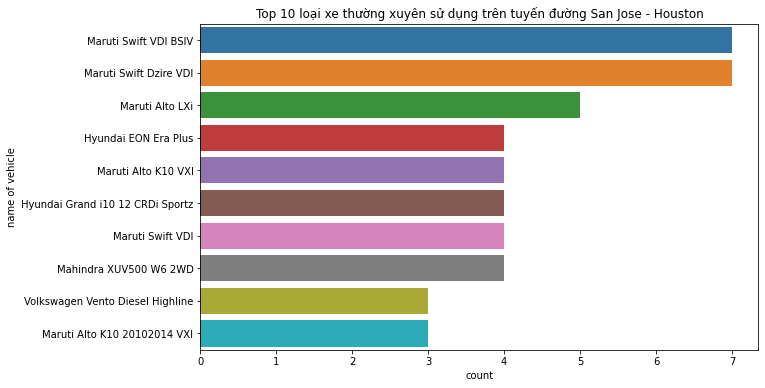

In [30]:
# Biểu đồ tần suất sử dụng các 10 loại xe thường xuyên nhất trên tuyến đường San Jose - Houston
plt.figure(figsize=(10, 6))
sns.countplot(y='name of vehicle', data=df[df['ROUTE'] == 'San Jose - Houston'], order=df[df['ROUTE'] == 'San Jose - Houston']['name of vehicle'].value_counts().iloc[:10].index)
plt.title('Top 10 loại xe thường xuyên sử dụng trên tuyến đường San Jose - Houston')
plt.show()

Nhận xét: ta thấy 'Maruti Swift VDI BSIV' và 'Maruti Swift Dzire VDI' là các xe thường đi qua tuyến đường 'San Jose - Houston' nhất (7 lần), tiếp đến một số xe như 'Maruti Alto LXi' (5 lần) và 'Hyundai EON Era Plus' (4 lần)

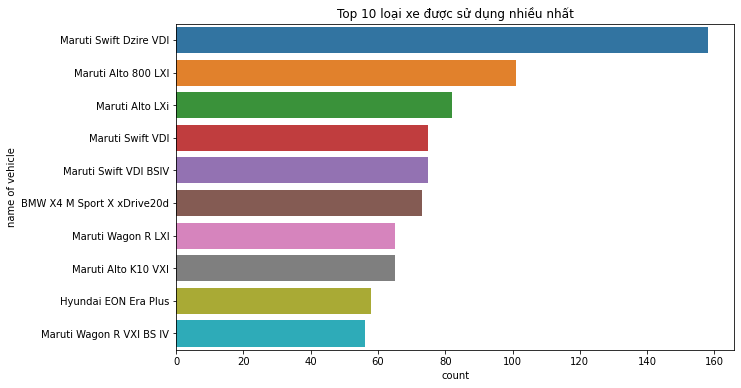

In [27]:
# top 10 loại xe được sử dụng nhiều nhất
plt.figure(figsize=(10, 6))
sns.countplot(y='name of vehicle', data=df, order=df['name of vehicle'].value_counts().iloc[:10].index)
plt.title('Top 10 loại xe được sử dụng nhiều nhất')
plt.show()

Nhận xét: ta thấy 'Maruti Swift Dzire VDI' là xe được sử dụng nhiều nhất (khoảng 160)

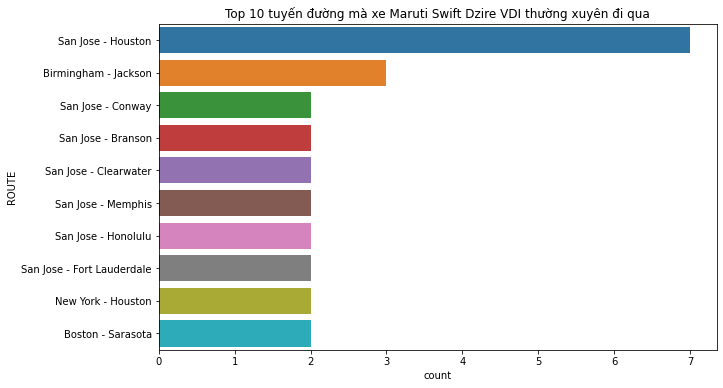

In [31]:
# các tuyến đường mà xe 'Maruti Swift Dzire VDI' thường xuyên đi qua
plt.figure(figsize=(10, 6))
sns.countplot(y='ROUTE', data=df[df['name of vehicle'] == 'Maruti Swift Dzire VDI'], order=df[df['name of vehicle'] == 'Maruti Swift Dzire VDI']['ROUTE'].value_counts().iloc[:10].index)
plt.title('Top 10 tuyến đường mà xe Maruti Swift Dzire VDI thường xuyên đi qua')
plt.show()

Nhận xét: 'San Jose - Houston' là tuyến đường mà xe 'Maruti Swift Dzire VDI' thường xuyên đi qua nhất (7 lần)

In [ ]:
# convert RECEIVERS_DATE to datetime
df['RECEIVERS_DATE'] = pd.to_datetime(df['RECEIVERS_DATE'])

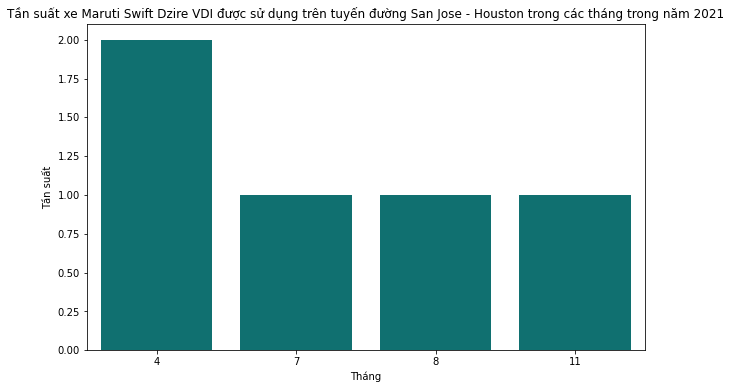

In [46]:
# biểu đồ tần suất xe 'Maruti Swift Dzire VDI' được sử dụng trên tuyến đường 'San Jose - Houston' trong các tháng trong năm 2021
plt.figure(figsize=(10, 6))
# lọc các dòng có tuyến đường là 'San Jose - Houston' và tên xe là 'Maruti Swift Dzire VDI'
df1 = df[(df['ROUTE'] == 'San Jose - Houston') & (df['name of vehicle'] == 'Maruti Swift Dzire VDI')]
# lọc các dòng có năm là 2021
df1 = df1[df1['RECEIVERS_DATE'].dt.year == 2021]
sns.countplot(x=df1['RECEIVERS_DATE'].dt.month, color='teal')
plt.xlabel('Tháng')
plt.ylabel('Tần suất')
plt.title('Tần suất xe Maruti Swift Dzire VDI được sử dụng trên tuyến đường San Jose - Houston trong các tháng trong năm 2021')
plt.show()

Nhận xét: trong năm 2021, xe 'Maruti Swift Dzire VDI' được sử dụng 2 lần vào tháng 4, 1 lần vào các tháng 7, 8, 11 trên tuyến đường 'San Jose - Houston'